## Home Credit Default Risk Challenge

#### https://www.kaggle.com/c/home-credit-default-risk

In [ ]:
# Many thanks to willkoehrsen and his Kaggle kernels for great help
# and an awesome introduction to this competition!

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

C:\Users\JoonH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Data



In [2]:
train_df = pd.read_csv("\\Users\\JoonH\\Desktop\\Home_Credit_Challenge\\all\\application_train.csv")
test_df = pd.read_csv("\\Users\\JoonH\\Desktop\\Home_Credit_Challenge\\all\\application_test.csv")

In [5]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Baseline

In [3]:
from sklearn.ensemble import RandomForestClassifier

X = train_df.copy()

Y = train_df.TARGET
X = X.drop('TARGET', axis = 1)

X = X.fillna(-999)

for c in train_df.columns[train_df.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
    
rf = RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
X_test = test_df.copy()

X_test = X_test.fillna(-999)

for c in test_df.columns[test_df.dtypes == 'object']:
    X_test[c] = X_test[c].factorize()[0]
    
results = rf.predict(X_test)

results = pd.Series(results,name="TARGET")

submission = pd.concat([test_df[['SK_ID_CURR']],results],axis = 1)
submission.to_csv("credit_submission_1.csv",index=False)

#### When submitted in Kaggle, the baseline provided us with 0.503, which is a common result for the bottom tier of the leaderboard. For a better result in the competition we should look more into the data through EDA and preprocess the data, along with further exploration of models other than RandomForest.

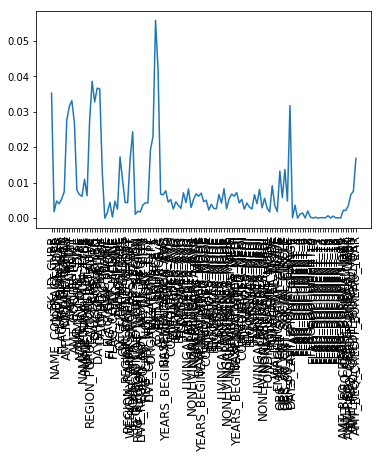

In [80]:
figure = plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation = 90, size='large', );

#### From observation through the graph presenting importance of features, we may find out that our model indicates those following as the 'significant features': 

In [81]:
print('Important features are', "SK_ID_CURR, AMT_CREDIT,AMT_Annuity, DAYS_BIRTH, DAYS_ID_PUBLISH")
print("OCCUPATION_TYPE, HOUR_APPR_PROCESS_START, EXT_SOURCE_2, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_YEAR")

Important features are SK_ID_CURR, AMT_CREDIT,AMT_Annuity, DAYS_BIRTH, DAYS_ID_PUBLISH
OCCUPATION_TYPE, HOUR_APPR_PROCESS_START, EXT_SOURCE_2, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_YEAR


#### Before diving into those variables, let's take a look at other comepetitors' kernels for more inspiration & analysis on different variables

##### Let's start with encoding the dataframe, then analyze features in detail for EDA

In [8]:
#label_coding

le = LabelEncoder()
le_count = 0

for col in train_df:
    if train_df[col].dtype == 'object':
        if len(list(train_df[col].unique())) <= 2:
            le.fit(train_df[col])
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])
            
            le_count += 1
print('%d columns label encoded.' % le_count)

3 columns label encoded.


In [9]:
#one-hot encoding 

train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print('Training Features shape', train_df.shape)
print('Testing Features shape', test_df.shape)

Training Features shape (307511, 243)
Testing Features shape (48744, 239)


In [10]:
#aligning data

train_labels= train_df['TARGET']
train_df, test_df = train_df.align(test_df, join = 'inner', axis = 1)
train_df['TARGET'] = train_labels
print(train_df.shape, test_df.shape)

(307511, 240) (48744, 239)


#### EDA

In [11]:
correlations = train_df.corr()['TARGET'].sort_values()

print('Most Positive correlations are shown: \n', correlations.tail(10))
print('Most negative correlations are shown: \n', correlations.head(10))

Most Positive correlations are shown: 
 NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most negative correlations are shown: 
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner

##### DAYS_BIRTH is the variable with most correlation with a value of 0.078, so let's take a look

In [12]:
train_df['DAYS_BIRTH'] = abs(train_df['DAYS_BIRTH'])

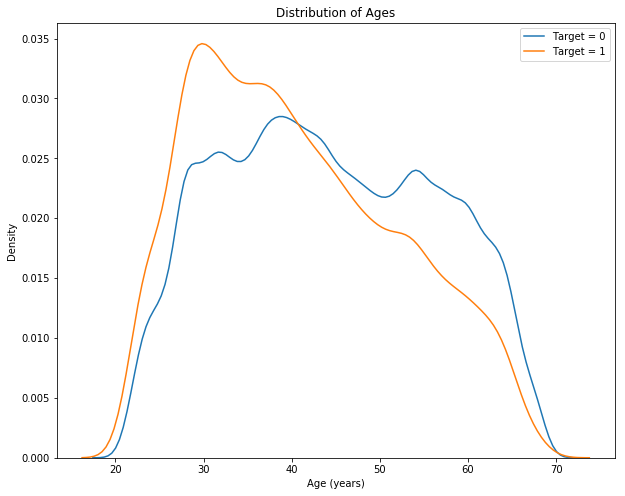

In [160]:
plt.figure(figsize = (10,8))
sns.kdeplot(train_df.loc[train_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Target = 0')
sns.kdeplot(train_df.loc[train_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Target = 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

###### From here we can see that alough the variable DAYS_BIRTH do not hold a large correlation with the target with only a value around 0.07, but it will still be useful in this scenario as the different distributions in the plot indicates age will affect target. In the case of age we may refer that younger applicants are less likely to pay back the loan in time. 

##### Aside from DAYS_BIRTH, EXT_SOURCES has shown the strongest negatives correlations. Let's take a look into that

In [162]:
ext_data = train_df[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data.corr()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


##### Let's look into the distribution of each variable by target value

C:\Users\JoonH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\JoonH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


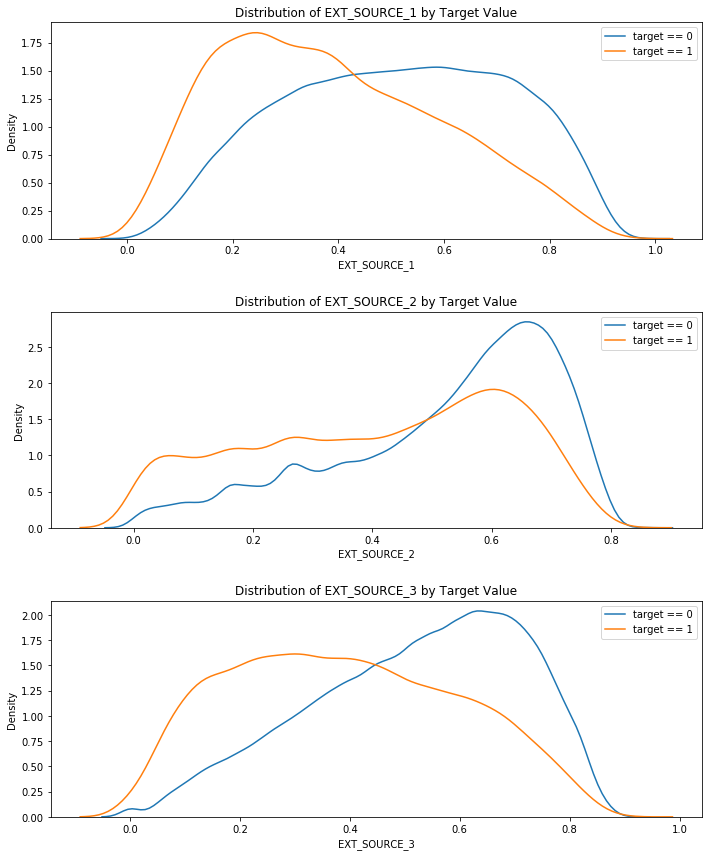

In [167]:
plt.figure(figsize = (10,12))

for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(train_df.loc[train_df['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(train_df.loc[train_df['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [13]:
#using polynomial features to generate a new dataframe

poly_features = train_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = test_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)


In [10]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [14]:
#Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                            columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'
                                                                         ,'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


##### corr shows us that polynomial features work much better than the original features.

In [15]:
#putting the features into dataframe

poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1',
                                                                                'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3',
                                                                                'DAYS_BIRTH']))
poly_features['SK_ID_CURR'] = train_df['SK_ID_CURR']
train_df_poly = train_df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

poly_features_test['SK_ID_CURR'] = train_df['SK_ID_CURR']
test_df_poly = test_df.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

train_df_poly, test_df_poly = train_df_poly.align(test_df_poly, join = 'inner', axis = 1)

print(train_df_poly.shape)
print(test_df_poly.shape)

(307511, 274)
(48744, 274)


In [13]:
from sklearn.preprocessing import MinMaxScaler, Imputer

if 'TARGET' in train_df:
    train = train_df.drop('TARGET', axis = 1)
else:
    train = train_df.copy()

test = test_df.copy()

imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


In [14]:
if 'TARGET' in train_df_poly:
    train = train_df_poly.drop('TARGET', axis = 1)
else:
    train = train_df_poly.copy()

test = test_df_poly.copy()

imputer = Imputer(strategy = 'mean')
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss= 'deviance', learning_rate=0.01,
                                 n_estimators=1000, subsample=1.0,
                                 criterion= 'friedman_mse',
                                 min_samples_split=2
                                 , min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=7, min_impurity_decrease=0.0,
                                 min_impurity_split=None, init=None, 
                                 random_state=None, max_features=None, 
                                 verbose=1, max_leaf_nodes=None, 
                                 warm_start=False, presort= 'auto')
gbc.fit(train, train_labels)

      Iter       Train Loss   Remaining Time 
         1           0.5597          344.72m
         2           0.5584          342.73m
         3           0.5571          340.91m
         4           0.5558          339.69m
         5           0.5546          339.06m
         6           0.5534          338.51m
         7           0.5523          337.57m
         8           0.5511          338.82m
         9           0.5500          340.14m
        10           0.5490          341.25m
        20           0.5396          337.10m
        30           0.5321          330.14m
        40           0.5260          323.27m
        50           0.5208          319.15m
        60           0.5164          314.40m
        70           0.5125          310.08m
        80           0.5091          305.88m
        90           0.5061          301.51m
       100           0.5035          297.04m
       200           0.4869          255.89m
       300           0.4775          219.30m
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [219]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 0.0001)

log.fit(train,train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_new = RandomForestClassifier(n_estimators=300, 
                                criterion= 'entropy', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features= 'auto' , max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=None, bootstrap=True, oob_score=False,
                                n_jobs=1, random_state=2, verbose=1, warm_start=False, class_weight=None)
rf_new.fit(train, train_labels)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=2, verbose=1, warm_start=False)

In [30]:
results_gbc = gbc.predict(test)
#results_gbc = pd.Series(results_gbc,name="TARGET")
#results_rf = rf_new.predict(test)
results = pd.Series(results_gbc, name = 'TARGET')

submission = pd.concat([test_df[['SK_ID_CURR']],results],axis = 1)
submission.to_csv("credit_sklearn_gbc.csv",index=False)

In [220]:
results_log = log.predict(test)

results_log = pd.Series(results_log,name="TARGET")

submission = pd.concat([test_df[['SK_ID_CURR']],results_log],axis = 1)
submission.to_csv("credit_sklearn_log.csv",index=False)

#### The new baseline with the gradient boosting classifier showed a better result at 0.513 on the leaderboard. Let's try to work our way up from here using feature engineering and utilizing more various models such as lightgbm

#### Looking at more financial data

In [16]:
train_df_domain = train_df.copy()
test_df_domain = test_df.copy()

train_df_domain['CREDIT_INCOME_PERCENT'] = train_df_domain['AMT_CREDIT'] / train_df_domain['AMT_INCOME_TOTAL']
train_df_domain['ANNUITY_INCOME_PERCENT'] = train_df_domain['AMT_ANNUITY'] / train_df_domain['AMT_INCOME_TOTAL']
train_df_domain['CREDIT_TERM'] = train_df_domain['AMT_ANNUITY'] / train_df_domain['AMT_CREDIT']
train_df_domain['DAYS_EMPLOYED_PERCENT'] = train_df_domain['DAYS_EMPLOYED'] / train_df_domain['DAYS_BIRTH']

'''
Referring to a script by Aguiar, (https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features)
we are looking at the following 4 features: credit income percent, annuity income
percent, credit term, days employed percent.
'''

test_df_domain['CREDIT_INCOME_PERCENT'] = test_df_domain['AMT_CREDIT'] / test_df_domain['AMT_INCOME_TOTAL']
test_df_domain['ANNUITY_INCOME_PERCENT'] = test_df_domain['AMT_ANNUITY'] / test_df_domain['AMT_INCOME_TOTAL']
test_df_domain['CREDIT_TERM'] = test_df_domain['AMT_ANNUITY'] / test_df_domain['AMT_CREDIT']
test_df_domain['DAYS_EMPLOYED_PERCENT'] = test_df_domain['DAYS_EMPLOYED'] / test_df_domain['DAYS_BIRTH']


C:\Users\JoonH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\JoonH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


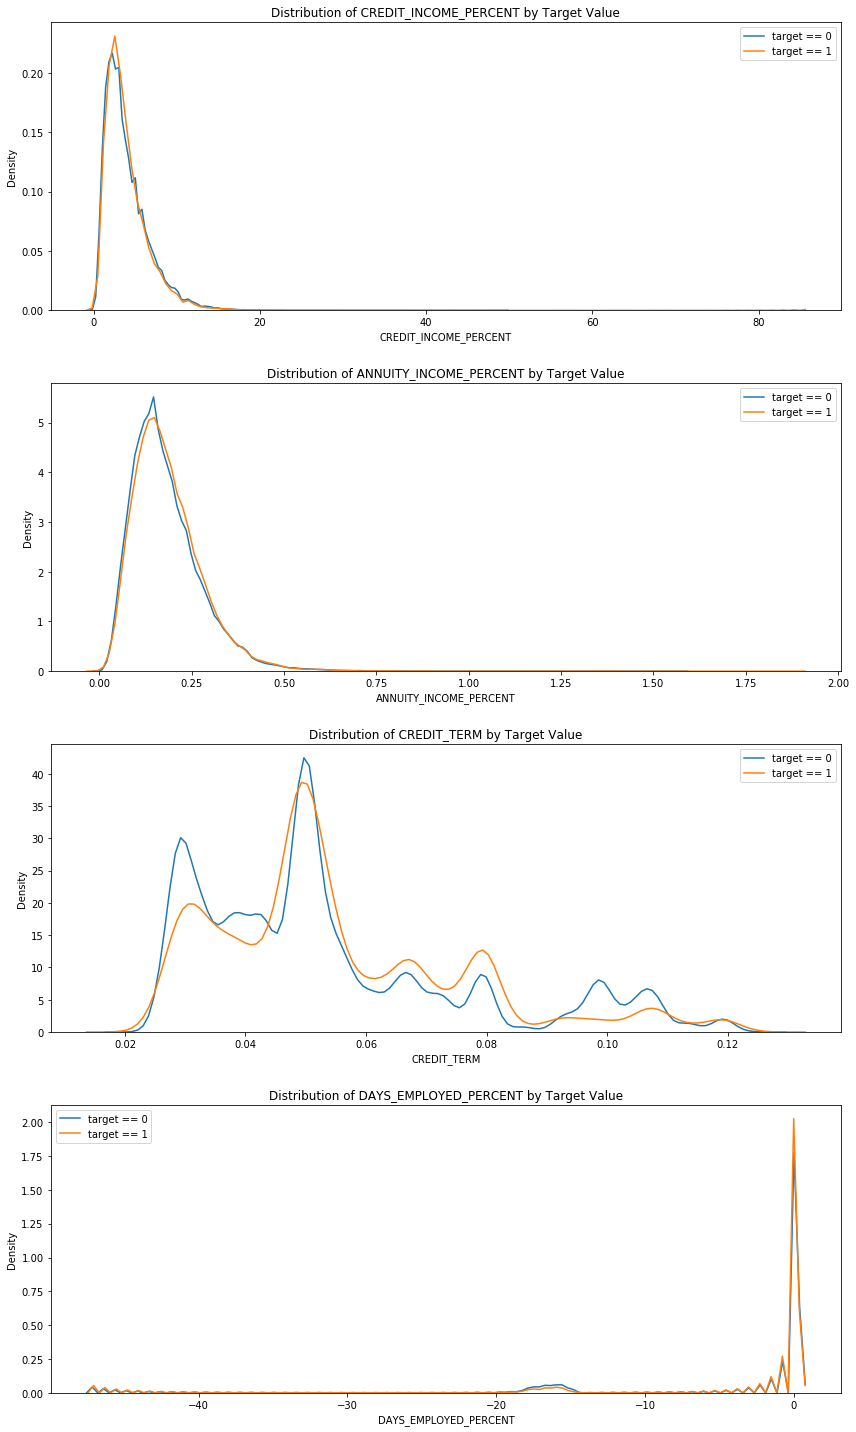

In [32]:
#Visualization

plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_df_domain.loc[train_df_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_df_domain.loc[train_df_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

#### Visualization of the features hardly shows us that they will be useful in terms of distinguishing label 0 from 1 as the distribution for both are very simillar, but we may find out how good they are with a model.

##### Let's try Lightgbm with poly_features and see if that helps.

In [18]:
from sklearn.preprocessing import MinMaxScaler, Imputer

poly_features_names = list(train_df_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(train_df_poly)
poly_features_test = imputer.transform(test_df_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)


#results = pd.Series(results,name="TARGET")

#submission = pd.concat([(pd.Series(test_df['SK_ID_CURR'], name = "SK_ID_CURR")), results], axis = 1)

#submission.to_csv("credit_submission_1.csv",index=False)


In [20]:
poly_domain_features = [poly_features,train_df_domain]
poly_domain_test = [poly_features_test, test_df_domain]

In [3]:
####### light gbm

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

#######

In [24]:
# thank you Will Koehrsen for an amazing kernel / this method!

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=2500000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.001, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

#### As hoped, the lightgbm baseline provided a much result of 0.744, let's see if we can make that better with poly_features and train_df_domain

In [23]:
submission, fi, metrics = model(train_df, test_df)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 238)
Testing Data Shape:  (48744, 238)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.750381	train's auc: 0.772728
[400]	valid's auc: 0.755268	train's auc: 0.791922
Early stopping, best iteration is:
[459]	valid's auc: 0.755383	train's auc: 0.796176
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.753068	train's auc: 0.771918
[400]	valid's auc: 0.758442	train's auc: 0.791592
[600]	valid's auc: 0.758867	train's auc: 0.805602
Early stopping, best iteration is:
[593]	valid's auc: 0.758928	train's auc: 0.80518
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.757846	train's auc: 0.770899
[400]	valid's auc: 0.763399	train's auc: 0.790472
[600]	valid's auc: 0.763924	train's auc: 0.804434
[800]	valid's auc: 0.763779	train's auc: 0.816482
Early stopping, best iteration is:
[705]	valid's auc: 0.76409	train's auc: 0.810868
Training until validation scores don't

##### Our baseline using lightGBM worked pretty well, let's try concatenating our poly features and domain (financial info) features and see if that improves the score

In [25]:
train_new = pd.concat([train_df_domain, train_df_poly], axis = 1)
test_new = pd.concat([test_df_domain, test_df_poly], axis = 1)

submission, fi, metrics = model(train_df_domain, test_df_domain)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.722681	train's auc: 0.731566
[400]	valid's auc: 0.725218	train's auc: 0.734964
[600]	valid's auc: 0.728338	train's auc: 0.738209
[800]	valid's auc: 0.731209	train's auc: 0.741269
[1000]	valid's auc: 0.733393	train's auc: 0.743864
[1200]	valid's auc: 0.735443	train's auc: 0.746547
[1400]	valid's auc: 0.738026	train's auc: 0.749644
[1600]	valid's auc: 0.740355	train's auc: 0.752515
[1800]	valid's auc: 0.742345	train's auc: 0.755159
[2000]	valid's auc: 0.744191	train's auc: 0.7578
[2200]	valid's auc: 0.746222	train's auc: 0.760441
[2400]	valid's auc: 0.747983	train's auc: 0.762903
[2600]	valid's auc: 0.749463	train's auc: 0.765133
[2800]	valid's auc: 0.750731	train's auc: 0.767267
[3000]	valid's auc: 0.751979	train's auc: 0.76923
[3200]	valid's auc: 0.753299	train's auc: 0.771242
[3400]	valid's auc: 0.754437	train's auc: 0.773093
[3600]	

[6200]	valid's auc: 0.768416	train's auc: 0.788533
[6400]	valid's auc: 0.768688	train's auc: 0.789497
[6600]	valid's auc: 0.768926	train's auc: 0.790442
[6800]	valid's auc: 0.76911	train's auc: 0.791335
[7000]	valid's auc: 0.769267	train's auc: 0.792212
[7200]	valid's auc: 0.769428	train's auc: 0.793075
[7400]	valid's auc: 0.76957	train's auc: 0.793899
[7600]	valid's auc: 0.76967	train's auc: 0.794719
[7800]	valid's auc: 0.769769	train's auc: 0.795536
[8000]	valid's auc: 0.769902	train's auc: 0.796343
[8200]	valid's auc: 0.770038	train's auc: 0.797109
[8400]	valid's auc: 0.770142	train's auc: 0.797858
[8600]	valid's auc: 0.770237	train's auc: 0.798606
[8800]	valid's auc: 0.770317	train's auc: 0.799344
[9000]	valid's auc: 0.770406	train's auc: 0.800074
[9200]	valid's auc: 0.770488	train's auc: 0.800827
[9400]	valid's auc: 0.770562	train's auc: 0.801581
[9600]	valid's auc: 0.770612	train's auc: 0.802305
[9800]	valid's auc: 0.770657	train's auc: 0.803018
[10000]	valid's auc: 0.770712	trai

In [26]:
submission.to_csv('credit_lightgbm.csv', index = False)

##### This gave us the best score of 0.752 so far! With continuous work on feature engineering and tuning our lightgbm it should get much better.

In [36]:
fi_sorted = fi.sort_values('importance', axis = 0, ascending = False)

In [56]:
fi_sorted.head(10)

,feature,importance
240,CREDIT_TERM,40032.0
30,EXT_SOURCE_1,26145.4
32,EXT_SOURCE_3,23755.2
31,EXT_SOURCE_2,20608.2
9,DAYS_BIRTH,17233.8
7,AMT_GOODS_PRICE,11065.6
6,AMT_ANNUITY,10585.2
12,DAYS_ID_PUBLISH,10209.6
241,DAYS_EMPLOYED_PERCENT,9620.8
5,AMT_CREDIT,8800.0


In [39]:
fi_sorted.tail(10)

,feature,importance
144,OCCUPATION_TYPE_HR staff,0.0
83,FLAG_DOCUMENT_4,0.0
196,ORGANIZATION_TYPE_Mobile,0.0
89,FLAG_DOCUMENT_10,0.0
81,FLAG_DOCUMENT_2,0.0
201,ORGANIZATION_TYPE_Religion,0.0
100,FLAG_DOCUMENT_21,0.0
98,FLAG_DOCUMENT_19,0.0
221,ORGANIZATION_TYPE_XNA,0.0
86,FLAG_DOCUMENT_7,0.0


In [101]:
cols_to_choose = fi_sorted[:45].drop('importance', axis = 1)['feature'].values
features_important = pd.concat([ train_df['TARGET'], train_new[cols_to_choose]], axis = 1)
features_important_test = test_new[cols_to_choose]

# now we have a train/test set that only includes features that our gbm
# thought was important!

##### We may observed some variables that appear to be very useful to our gbm, and also those that appear to be unncessary. After some hyperparameter tuning we may do some more feature engineering.

#### Hyperparameter tuning with gbm

In [68]:
# Unlike normal parameters generated during training of a model, hyperparameter
# refers to parameters set by the user before training takes place. We will use
# hyperparameter to see if we can improve our model. 

model = lgb.LGBMModel() 

print (model.get_params())

{'class_weight': None, 'n_jobs': -1, 'max_depth': -1, 'silent': True, 'boosting_type': 'gbdt', 'subsample': 1.0, 'min_child_weight': 0.001, 'min_child_samples': 20, 'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31, 'colsample_bytree': 1.0, 'subsample_freq': 0, 'reg_alpha': 0.0, 'objective': None, 'subsample_for_bin': 200000, 'random_state': None, 'min_split_gain': 0.0, 'reg_lambda': 0.0}


In [70]:
from sklearn.model_selection import train_test_split

labels = np.array(features_important['TARGET'].astype(np.int32)).reshape((-1, ))
features = features_important.drop(columns = ['TARGET'])

# Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 6000, random_state = 50)

train_set = lgb.Dataset(data = train_features, label = train_labels)
test_set = lgb.Dataset(data = test_features, label = test_labels)

In [71]:
def objective(hyperparameters, iteration):
    """Objective function for grid and random search. Returns
       the cross validation score from a set of hyperparameters."""
    
    # Number of estimators will be found using early stopping
    if 'n_estimators' in hyperparameters.keys():
        del hyperparameters['n_estimators']
    
     # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = 5, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 42)
    
    # results to retun
    score = cv_results['auc-mean'][-1]
    estimators = len(cv_results['auc-mean'])
    hyperparameters['n_estimators'] = estimators 
    
    return [score, hyperparameters, iteration]

In [130]:
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 1000)),
    'learning_rate': list(np.logspace(np.log10(0.0001), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

MAX_EVALS = 5

import itertools

def grid_search(param_grid, max_evals = MAX_EVALS):
    """Grid search algorithm (with limit on max evals)"""
    
    # Dataframe to store results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))
    
    # https://codereview.stackexchange.com/questions/171173/list-all-possible-permutations-from-a-python-dictionary-of-lists
    keys, values = zip(*param_grid.items())
    
    i = 0
    
    # Iterate through every possible combination of hyperparameters
    for v in itertools.product(*values):
        
        # Create a hyperparameter dictionary
        hyperparameters = dict(zip(keys, v))
        
        # Set the subsample ratio accounting for boosting type
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']
        
        # Evalute the hyperparameters
        eval_results = objective(hyperparameters, i)
        
        results.loc[i, :] = eval_results
        
        i += 1
        
        # Normally would not limit iterations
        if i > MAX_EVALS:
            break
       
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    
    return results   

In [73]:
# Dataframes for random and grid search
random_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

grid_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

In [134]:
grid_results = grid_search(param_grid)

print('The best validation score was {:.5f}'.format(grid_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

import pprint
pprint.pprint(grid_results.loc[0, 'params'])

The best validation score was 0.73735

The best hyperparameters were:
{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'is_unbalance': True,
 'learning_rate': 0.0001,
 'metric': 'auc',
 'min_child_samples': 20,
 'n_estimators': 73,
 'num_leaves': 25,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 0.5,
 'subsample_for_bin': 20000,
 'verbose': 1}


##### Since gridsearch will take very long while evaluating every single possible combination of the hyperparameter, we will take a look at random search

In [131]:
def random_search(param_grid, max_evals = MAX_EVALS):
    """Random search for hyperparameter optimization"""
    
    # Dataframe for results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(MAX_EVALS)))
    
    # Keep searching until reach max evaluations
    for i in range(MAX_EVALS):
        
        # Choose random hyperparameters
        hyperparameters = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']

        # Evaluate randomly selected hyperparameters
        eval_results = objective(hyperparameters, i)
        
        results.loc[i, :] = eval_results
    
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    return results 

In [132]:
import random

random.seed(50)

random_results = random_search(param_grid)

print('The best validation score was {:.5f}'.format(random_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

import pprint
pprint.pprint(random_results.loc[0, 'params'])

The best validation score was 0.75738

The best hyperparameters were:
{'boosting_type': 'dart',
 'colsample_bytree': 0.6444444444444444,
 'is_unbalance': True,
 'learning_rate': 0.14278320323810664,
 'metric': 'auc',
 'min_child_samples': 460,
 'n_estimators': 51,
 'num_leaves': 460,
 'reg_alpha': 0.8979591836734693,
 'reg_lambda': 0.836734693877551,
 'subsample': 0.7121212121212122,
 'subsample_for_bin': 140000,
 'verbose': 1}


##### Using the parameters we got from random search, we may build another model and examine its performance

In [31]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(boosting_type = 'gbdt' ,n_estimators=1000, 
                                   objective = 'binary', colsample_bytree = 0.6
                                   , is_unbalance = True,
                                   learning_rate = 0.001, metric = 'auc',
                                   num_leaves = 150, min_child_samples = 20,
                                   reg_alpha = 0.0, reg_lambda = 0.0, 
                                   subsample_for_bin = 20000, verbose = 1,
                                   subsample = 0.5, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [136]:
submission, fi, metrics = model(train_df_domain, test_df_domain)
print('Baseline metrics')
print(metrics)

submission.to_csv('credit_lightgbm.csv', index = False)

Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[35]	valid's auc: 0.737339	train's auc: 0.745023
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[72]	valid's auc: 0.736138	train's auc: 0.742489
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[72]	valid's auc: 0.741229	train's auc: 0.741219
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[72]	valid's auc: 0.733976	train's auc: 0.742828
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[72]	valid's auc: 0.733939	train's auc: 0.74247
Baseline metrics
      fold     train     valid
0        0  0.745023  0.737339
1        1  0.742489  0.736138
2        2  0.741219 

In [100]:
train_df_poly_2 = pd.concat([train_df['TARGET'],train_df_poly], axis = 1)

submission, fi, metrics = model(train_df_poly_2, test_df_poly)
print('Baseline metrics')
print(metrics)

submission.to_csv('credit_lightgbm.csv', index = False)

Training Data Shape:  (307511, 273)
Testing Data Shape:  (48744, 273)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.753089	train's auc: 0.798398
Did not meet early stopping. Best iteration is:
[349]	valid's auc: 0.754864	train's auc: 0.822946
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.755009	train's auc: 0.797894
Did not meet early stopping. Best iteration is:
[323]	valid's auc: 0.756424	train's auc: 0.819244
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.759621	train's auc: 0.79692
Did not meet early stopping. Best iteration is:
[358]	valid's auc: 0.762027	train's auc: 0.823753
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.754989	train's auc: 0.797778
Did not meet early stopping. Best iteration is:
[352]	valid's auc: 0.757105	train's auc: 0.823083
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.753

In [105]:
features_important = pd.concat([train_df['SK_ID_CURR'],features_important], axis = 1)

In [113]:
features_important_test = pd.concat([test_df['SK_ID_CURR'],features_important_test], axis = 1)

In [116]:
features_important = pd.concat([train_df['TARGET'],features_important], axis = 1)
features_important.head()

,TARGET,SK_ID_CURR,CREDIT_TERM,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,AMT_GOODS_PRICE,AMT_GOODS_PRICE,AMT_ANNUITY,...,APARTMENTS_AVG,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE,FLAG_WORK_PHONE,BASEMENTAREA_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_AVG
0,1,100002,0.060749,0.083037,0.139376,0.262949,9461,351000.0,351000.0,24700.5,...,0.0247,0.0247,2.0,2.0,0,0,0.0369,0.0369,0.9722,0.9722
1,0,100003,0.027598,0.311267,NaN,0.622246,16765,1129500.0,1129500.0,35698.5,...,0.0959,0.0959,1.0,1.0,0,0,0.0529,0.0529,0.9851,0.9851
2,0,100004,0.050000,NaN,0.729567,0.555912,19046,135000.0,135000.0,6750.0,...,NaN,NaN,0.0,0.0,1,1,NaN,NaN,NaN,NaN
3,0,100006,0.094941,NaN,NaN,0.650442,19005,297000.0,297000.0,29686.5,...,NaN,NaN,2.0,2.0,0,0,NaN,NaN,NaN,NaN
4,0,100007,0.042623,NaN,NaN,0.322738,19932,513000.0,513000.0,21865.5,...,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN


In [141]:
submission, fi, metrics = model(features_important, features_important_test)
print('Baseline metrics')
print(metrics)

submission.to_csv('credit_lightgbm.csv', index = False)

Training Data Shape:  (307511, 82)
Testing Data Shape:  (48744, 82)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.745417	train's auc: 0.781261
Early stopping, best iteration is:
[152]	valid's auc: 0.745552	train's auc: 0.780732
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.748013	train's auc: 0.780567
Early stopping, best iteration is:
[226]	valid's auc: 0.748032	train's auc: 0.780702
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.750869	train's auc: 0.779142
Early stopping, best iteration is:
[226]	valid's auc: 0.750967	train's auc: 0.779237
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.747381	train's auc: 0.780729
Early stopping, best iteration is:
[195]	valid's auc: 0.747455	train's auc: 0.780765
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.748058	train's auc: 0.780377
Early stopping, best iterat

#### More Feature Engineering: let's try using the automated feature engineering!

In [129]:
# We will use the Featurestools library for this part!

In [142]:
#!pip install featuretools

  Running setup.py bdist_wheel for featuretools: started
  Running setup.py bdist_wheel for featuretools: finished with status 'done'
  Stored in directory: C:\Users\JoonH\AppData\Local\pip\Cache\wheels\bb\75\ac\a1bdc9cb829597d4db0d12712f76b6aec9812f6916607d3ee4
  Running setup.py bdist_wheel for s3fs: started
  Running setup.py bdist_wheel for s3fs: finished with status 'done'
  Stored in directory: C:\Users\JoonH\AppData\Local\pip\Cache\wheels\ce\ad\af\891f2ad3a0702ce5064c382ea50d4502315443f25c1f3842cf
  Running setup.py bdist_wheel for pympler: started
  Running setup.py bdist_wheel for pympler: finished with status 'done'
  Stored in directory: C:\Users\JoonH\AppData\Local\pip\Cache\wheels\4a\08\ac\e3953e63132ac2e5854fc3e19ab981a6566ad6a41031f0c3da
Successfully built featuretools s3fs pympler
  Found existing installation: dask 0.17.3
    Uninstalling dask-0.17.3:
      Successfully uninstalled dask-0.17.3
  Found existing installation: distributed 1.21.6
    Uninstalling distribut

In [6]:
#import pandas as pd
#import numpy as np
import featuretools as ft
import warnings
warnings.filterwarnings('ignore')

In [33]:
#taking in data

# Read in the datasets and limit to the first 1000 rows (sorted by SK_ID_CURR) 
# This allows us to actually see the results in a reasonable amount of time! 
app_train = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/application_train.csv').sort_values('SK_ID_CURR').reset_index(drop = True) #.loc[:1000, :]
app_test = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/application_test.csv').sort_values('SK_ID_CURR').reset_index(drop = True) #.loc[:1000, :]
bureau = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/bureau.csv').sort_values(['SK_ID_CURR', 'SK_ID_BUREAU']).reset_index(drop = True) #.loc[:1000, :]
bureau_balance = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/bureau_balance.csv').sort_values('SK_ID_BUREAU').reset_index(drop = True) #.loc[:1000, :]
cash = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/POS_CASH_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True) #.loc[:1000, :]
credit = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/credit_card_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True) #.loc[:1000, :]
previous = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True) #.loc[:1000, :]
installments = pd.read_csv('/Users/JoonH/Desktop/Home_Credit_Challenge/all/installments_payments.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index(drop = True) #.loc[:1000, :]


# Add identifying column
app_train['set'] = 'train'
app_test['set'] = 'test'
app_test["TARGET"] = np.nan

# Append the dataframes
app = app_train.append(app_test, ignore_index = True)

In [34]:
# build an entity set, which is like a pandas dataframe

es = ft.EntitySet(id = 'clients')

In [35]:
# Entities with a unique index
es = es.entity_from_dataframe(entity_id = 'app', dataframe = app, index = 'SK_ID_CURR')

es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = bureau, index = 'SK_ID_BUREAU')

es = es.entity_from_dataframe(entity_id = 'previous', dataframe = previous, index = 'SK_ID_PREV')

# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'bureau_balance', dataframe = bureau_balance, 
                              make_index = True, index = 'bureaubalance_index')

es = es.entity_from_dataframe(entity_id = 'cash', dataframe = cash, 
                              make_index = True, index = 'cash_index')

es = es.entity_from_dataframe(entity_id = 'installments', dataframe = installments,
                              make_index = True, index = 'installments_index')

es = es.entity_from_dataframe(entity_id = 'credit', dataframe = credit,
                              make_index = True, index = 'credit_index')

In [147]:
# Establishing relationships of the data tables
# Bureau data is child of the original train app data as it holds multiple
# prev. sk_id for current sk_id.

print('Parent: app, Parent Variable: SK_ID_CURR\n\n', app.iloc[:, 111:115].head())
print('\nChild: bureau, Child Variable: SK_ID_CURR\n\n', bureau.iloc[10:30, :4].head())

Parent: app, Parent Variable: SK_ID_CURR

    SK_ID_CURR  TARGET  TOTALAREA_MODE WALLSMATERIAL_MODE
0      100002     1.0          0.0149       Stone, brick
1      100003     0.0          0.0714              Block
2      100004     0.0             NaN                NaN
3      100006     0.0             NaN                NaN
4      100007     0.0             NaN                NaN

Child: bureau, Child Variable: SK_ID_CURR

     SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY
10      100002       6158905        Closed      currency 1
11      100002       6158906        Closed      currency 1
12      100002       6158907        Closed      currency 1
13      100002       6158908        Closed      currency 1
14      100002       6158909        Active      currency 1


In [36]:
# for each sk_id_curr there are multiple sk_id_bureau, and now the
# 2 tables are linked by sk_id_curr.
# For each relationship, the parent and child variable should be defined.
# The relationship diagram provided by the host of the competition makes
# the process much easier. 

# Relationship between app and bureau
r_app_bureau = ft.Relationship(es['app']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])

# Relationship between bureau and bureau balance
r_bureau_balance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_balance']['SK_ID_BUREAU'])

# Relationship between current app and previous apps
r_app_previous = ft.Relationship(es['app']['SK_ID_CURR'], es['previous']['SK_ID_CURR'])

# Relationships between previous apps and cash, installments, and credit
r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'], es['cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['previous']['SK_ID_PREV'], es['installments']['SK_ID_PREV'])
r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])


# Add in the defined relationships
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])
# Print out the EntitySet
es

Entityset: clients
  Entities:
    app [Rows: 356255, Columns: 123]
    installments [Rows: 13605401, Columns: 9]
    bureau [Rows: 1716428, Columns: 17]
    credit [Rows: 3840312, Columns: 24]
    bureau_balance [Rows: 27299925, Columns: 4]
    previous [Rows: 1670214, Columns: 37]
    cash [Rows: 10001358, Columns: 9]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous.SK_ID_CURR -> app.SK_ID_CURR
    cash.SK_ID_PREV -> previous.SK_ID_PREV
    installments.SK_ID_PREV -> previous.SK_ID_PREV
    credit.SK_ID_PREV -> previous.SK_ID_PREV

In [149]:
# *** Be careful to not create diamond graph where there are multiple paths from
# a parent to child, as this generates ambiguity.

In [150]:
# Now we will work on feature primitive, an operation where features are made.
# The operations fall under aggregation and transformation.
# List the primitives in a dataframe
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(10)

,name,type,description
0,any,aggregation,Test if any value is 'True'.
1,all,aggregation,Test if all values are 'True'.
2,count,aggregation,Counts the number of non null values.
3,percent_true,aggregation,Finds the percent of 'True' values in a boolean feature.
4,min,aggregation,Finds the minimum non-null value of a numeric feature.
5,mean,aggregation,Computes the average value of a numeric feature.
6,mode,aggregation,Finds the most common element in a categorical feature.
7,num_true,aggregation,Finds the number of 'True' values in a boolean.
8,num_unique,aggregation,Returns the number of unique categorical variables.
9,last,aggregation,Returns the last value.


In [151]:
primitives[primitives['type'] == 'transform'].head(10)

,name,type,description
19,characters,transform,Return the characters in a given string.
20,divide,transform,Creates a transform feature that divides two features.
21,not,transform,"For each value of the base feature, negates the boolean value."
22,longitude,transform,Returns the second value on the tuple base feature.
23,subtract,transform,Creates a transform feature that subtracts two features.
24,minutes,transform,Transform a Timedelta feature into the number of minutes.
25,minute,transform,Transform a Datetime feature into the minute.
26,diff,transform,Compute the difference between the value of a base feature and the previous value.
27,days_since,transform,"For each value of the base feature, compute the number of days between it"
28,absolute,transform,Absolute value of base feature.


In [152]:
# Now we will do some Deep Feature Synthesis (DFS)
# Where feature primitives are stacked at a depth equal to the number of
# primitives. 
# read https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
# for more information of DFS

In [37]:
# Default primitives from featuretools
default_agg_primitives =  ["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
default_trans_primitives =  ["day", "year", "month", "weekday", "haversine", "numwords", "characters"]

# DFS with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'app',
                       trans_primitives = default_trans_primitives,
                       agg_primitives=default_agg_primitives, 
                       max_depth = 2, features_only=True)

print('%d Total Features' % len(feature_names))

1697 Total Features


In [2]:
# Let's load the resulting dataframe from Will Koehrsen's kernel instead

feature_matrix = pd.read_csv("/Users/JoonH/Desktop/Home_Credit_Challenge/all/total_feature_matrix.csv")

feature_matrix.head()

,LIVE_REGION_NOT_WORK_REGION,APARTMENTS_AVG,HOUSETYPE_MODE,FLAG_DOCUMENT_19,TOTALAREA_MODE,FLAG_DOCUMENT_11,DAYS_EMPLOYED,ELEVATORS_MEDI,FLAG_DOCUMENT_10,YEARS_BEGINEXPLUATATION_MEDI,...,SKEW(bureau.SUM(bureau_balance.MONTHS_BALANCE)),MEAN(previous.SUM(credit.CNT_DRAWINGS_OTHER_CURRENT)),MEAN(previous.MAX(installments.AMT_INSTALMENT)),MAX(previous.STD(credit.SK_DPD)),STD(previous.SUM(credit.SK_DPD_DEF)),SKEW(previous.MEAN(cash.CNT_INSTALMENT)),MIN(previous.STD(credit.AMT_INST_MIN_REGULARITY)),STD(previous.MIN(installments.NUM_INSTALMENT_VERSION)),MIN(previous.SKEW(installments.SK_ID_CURR)),MIN(previous.SUM(cash.SK_DPD))
0,0,0.0660,block of flats,0,0.0392,0,-2329,NaN,0,0.9732,...,-1.381741,NaN,17397.900,NaN,NaN,0.000000,NaN,0.0,0.0,0.0
1,0,0.0247,block of flats,0,0.0149,0,-637,0.00,0,0.9722,...,0.286299,NaN,53093.745,NaN,NaN,0.000000,NaN,0.0,0.0,0.0
2,0,0.0959,block of flats,0,0.0714,0,-1188,0.08,0,0.9851,...,NaN,NaN,210713.445,NaN,NaN,-0.678654,NaN,0.0,0.0,0.0
3,0,NaN,NaN,0,NaN,0,-225,NaN,0,NaN,...,NaN,NaN,10573.965,NaN,NaN,0.000000,NaN,0.0,0.0,0.0
4,0,NaN,NaN,0,NaN,0,-4469,NaN,0,NaN,...,-0.684464,NaN,17656.245,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [3]:
print(feature_matrix.shape)

(356255, 1697)


In [38]:
# DFS with default primitives
feature_matrix, feature_names = ft.dfs(entityset = es, target_entity = 'app',
                                       trans_primitives = default_trans_primitives,
                                       agg_primitives=default_agg_primitives, 
                                        max_depth = 2, features_only=False, verbose = True)

pd.options.display.max_columns = 1700
feature_matrix.head(10)

Built 1697 features
Elapsed: 14:49:09 | Remaining: 00:00 | Progress: 100%|███████████████████████████████████████| Calculated: 11/11 chunks


LIVE_REGION_NOT_WORK_REGION  APARTMENTS_AVG  HOUSETYPE_MODE  \
SK_ID_CURR                                                                
100001                                0          0.0660  block of flats   
100002                                0          0.0247  block of flats   
100003                                0          0.0959  block of flats   
100004                                0             NaN             NaN   
100005                                0             NaN             NaN   
100006                                0             NaN             NaN   
100007                                0             NaN             NaN   
100008                                0             NaN             NaN   
100009                                0             NaN             NaN   
100010                                0             NaN             NaN   

            FLAG_DOCUMENT_19  TOTALAREA_MODE  FLAG_DOCUMENT_11  DAYS_EMPLOYED  \
SK_ID_CURR                                                                      
100001                     0          0.0392                 0          -2329   
100002                     0          0.0149                 0           -637   
100003                     0          0.0714                 0          -1188   
100004                     0             NaN                 0           -225   
100005                     0             NaN                 0          -4469   
100006                     0             NaN                 0          -3039   
100007                     0             NaN                 0          -3038   
100008                     0             NaN                 0          -1588   
100009                     0             NaN                 0          -3130   
100010                     0             NaN                 0           -449   

            ELEVATORS_MEDI  FLAG_DOCUMENT_10  YEARS_BEGINEXPLUATATION_MEDI  \
SK_ID_CURR                                                                   
100001                 NaN                 0                        0.9732   
100002                0.00                 0                        0.9722   
100003                0.08                 0                        0.9851   
100004                 NaN                 0                           NaN   
100005                 NaN                 0                           NaN   
100006                 NaN                 0                           NaN   
100007                 NaN                 0                           NaN   
100008                 NaN                 0                           NaN   
100009                 NaN                 0                           NaN   
100010                 NaN                 0                           NaN   

            FLOORSMIN_MEDI WEEKDAY_APPR_PROCESS_START  ENTRANCES_MODE  \
SK_ID_CURR                                                              
100001                 NaN                    TUESDAY          0.1379   
100002              0.1250                  WEDNESDAY          0.0690   
100003              0.3333                     MONDAY          0.0345   
100004                 NaN                     MONDAY             NaN   
100005                 NaN                     FRIDAY             NaN   
100006                 NaN                  WEDNESDAY             NaN   
100007                 NaN                   THURSDAY             NaN   
100008                 NaN                  WEDNESDAY             NaN   
100009                 NaN                     SUNDAY             NaN   
100010                 NaN                     MONDAY             NaN   

            ENTRANCES_MEDI  LIVINGAREA_AVG  YEARS_BEGINEXPLUATATION_MODE  \
SK_ID_CURR                                                                 
100001              0.1379          0.0505                        0.9732   
100002              0.0690          0.0190                        0.9722   
100003              

In [40]:
feature_matrix.to_csv("total_feature_matrix.csv", index = False)

In [4]:
# Since too many uninmportant features can 'drown' out the important
# features, we will specify a smaller set of features

# Specify the aggregation primitives
feature_matrix_spec, feature_names_spec = ft.dfs(entityset = es, target_entity = 'app',  
                                                 agg_primitives = ['sum', 'count', 'min', 'max', 'mean', 'mode'], 
                                                 max_depth = 2, features_only = False, verbose = True)


NameError: name 'ft' is not defined

##### So far we have looked into how featuretools library can be used to generate a nice
##### new dataset, and we can determine our implementation through:
##### 1. Comparison of CV/leaderboard score with different datasets
##### 2. Corr() between data features and 'TARGET'
##### 3. Feature importances shown after training a gbm model

In [ ]:
correlations = pd.read_csv('../input/home-credit-default-risk-feature-tools/correlations_spec.csv', index_col = 0)
correlations.index.name = 'Variable'
correlations.head()

In [ ]:
correlations_target = correlations.sort_values('TARGET')['TARGET']
# Most negative correlations
correlations_target.head()

In [ ]:
# Most positive correlations
correlations_target.dropna().tail()

In [ ]:
features_sample = pd.read_csv('../input/home-credit-default-risk-feature-tools/feature_matrix.csv', nrows = 20000)
features_sample = features_sample[features_sample['set'] == 'train']
features_sample.head()

In [ ]:
def kde_target_plot(df, feature):
    """Kernel density estimate plot of a feature colored
    by value of the target."""
    
    # Need to reset index for loc to workBU
    df = df.reset_index()
    plt.figure(figsize = (10, 6))
    plt.style.use('fivethirtyeight')
    
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of Feature by Target Value')
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    plt.show()

In [ ]:
kde_target_plot(features_sample, feature = 'MAX(previous_app.MEAN(credit.CNT_DRAWINGS_ATM_CURRENT))')

In [ ]:
threshold = 0.9

correlated_pairs = {}

# Iterate through the columns
for col in correlations:
    # Find correlations above the threshold
    above_threshold_vars = [x for x in list(correlations.index[correlations[col] > threshold]) if x != col]
    correlated_pairs[col] = above_threshold_vars

correlated_pairs['MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)']

In [ ]:
correlations['MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)'].sort_values(ascending=False).head()

In [ ]:
plt.plot(features_sample['MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)'], features_sample['MEAN(previous_app.MEAN(credit.AMT_PAYMENT_CURRENT))'], 'bo')
plt.title('Highly Correlated Features');

In [ ]:
# Read in the feature importances and sort with the most important at the top
fi = pd.read_csv('../input/home-credit-default-risk-feature-tools/spec_feature_importances_ohe.csv', index_col = 0)
fi = fi.sort_values('importance', ascending = False)
fi.head(15)

In [ ]:
kde_target_plot(features_sample, feature = 'MAX(bureau.DAYS_CREDIT)')

In [ ]:
# List of the original features (after one-hot)
original_features = list(pd.get_dummies(app).columns)

created_features = []

# Iterate through the top 100 features
for feature in fi['feature'][:100]:
    if feature not in original_features:
        created_features.append(feature)
        
print('%d of the top 100 features were made by featuretools' % len(created_features))

In [ ]:
print('There are %d features with 0 importance' % sum(fi['importance'] == 0.0))

In [41]:
from featuretools import selection

# Remove features with only one unique value
feature_matrix2 = selection.remove_low_information_features(feature_matrix)

print('Removed %d features' % (feature_matrix.shape[1]- feature_matrix2.shape[1]))

Removed 0 features


In [ ]:
# Separate out the train and test sets
train = feature_matrix2[feature_matrix2['set'] == 'train']
test = feature_matrix2[feature_matrix2['set'] == 'test']

# One hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align dataframes on the columns
train, test = train.align(test, join = 'inner', axis = 1)
test = test.drop(columns = ['TARGET'])

print('Final Training Shape: ', train.shape)
print('Final Testing Shape: ', test.shape)

In [27]:
train_2 = train.reset_index(drop=False)
test_2 = test.reset_index(drop=False)
#train_2.head()

SK_ID_CURR  LIVE_REGION_NOT_WORK_REGION  APARTMENTS_AVG  TOTALAREA_MODE  \
0      100002                            0          0.0247          0.0149   
1      100003                            0          0.0959          0.0714   
2      100004                            0             NaN             NaN   
3      100006                            0             NaN             NaN   
4      100007                            0             NaN             NaN   

   FLAG_DOCUMENT_11  DAYS_EMPLOYED  ELEVATORS_MEDI  \
0                 0           -637            0.00   
1                 0          -1188            0.08   
2                 0           -225             NaN   
3                 0          -3039             NaN   
4                 0          -3038             NaN   

   YEARS_BEGINEXPLUATATION_MEDI  FLOORSMIN_MEDI  ENTRANCES_MODE  \
0                        0.9722          0.1250          0.0690   
1                        0.9851          0.3333          0.0345   
2                           NaN             NaN             NaN   
3                           NaN             NaN             NaN   
4                           NaN             NaN             NaN   

   ENTRANCES_MEDI  LIVINGAREA_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0          0.0690          0.0190                        0.9722   
1          0.0345          0.0549                        0.9851   
2             NaN             NaN                           NaN   
3             NaN             NaN                           NaN   
4             NaN             NaN                           NaN   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_8  AMT_CREDIT  \
0                       2.0                0    406597.5   
1                       0.0                0   1293502.5   
2                       0.0                0    135000.0   
3                       0.0                0    312682.5   
4                       0.0                1    513000.0   

   HOUR_APPR_PROCESS_START  YEARS_BUILD_AVG  EXT_SOURCE_1  \
0                       10           0.6192      0.083037   
1                       11           0.7960      0.311267   
2                        9              NaN           NaN   
3                       17              NaN           NaN   
4                       11              NaN           NaN   

   NONLIVINGAPARTMENTS_MEDI  AMT_GOODS_PRICE  TARGET  APARTMENTS_MODE  \
0                    0.0000         351000.0     1.0           0.0252   
1                    0.0039        1129500.0     0.0           0.0924   
2                       NaN         135000.0     0.0              NaN   
3                       NaN         297000.0     0.0              NaN   
4                       NaN         513000.0     0.0              NaN   

   FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  \
0         0.1250                   0.0000                  0.022   
1         0.3333                   0.0039                  0.079   
2            NaN                      NaN                    NaN   
3            NaN                      NaN                    NaN   
4            NaN                      NaN                    NaN   

   REG_REGION_NOT_WORK_REGION  CNT_FAM_MEMBERS  FLAG_DOCUMENT_14  \
0                           0              1.0                 0   
1                           0              2.0                 0   
2                           0              1.0                 0   
3                           0              2.0                 0   
4                           0              1.0                 0   

   LANDAREA_MEDI  FLOORSMAX_MODE  COMMONAREA_MODE  LIVINGAREA_MODE  \
0         0.0375          0.0833           0.0144           0.0198   
1         0.0132          0.2917           0.0497           0.0554   
2            NaN             NaN              NaN              NaN   
3            NaN             NaN              NaN              NaN   
4            NaN             NaN              NaN              NaN  

In [32]:
submission, fi, metrics = model(train_2, test_2)
print('Baseline metrics')
print(metrics)

submission.to_csv('credit_lightgbm.csv', index = False)

Training Data Shape:  (1001, 1689)
Testing Data Shape:  (1001, 1689)
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.672178	train's auc: 0.961962
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.788829	train's auc: 0.99961
Early stopping, best iteration is:
[274]	valid's auc: 0.793874	train's auc: 0.999829
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid's auc: 0.750991	train's auc: 0.996125
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid's auc: 0.764406	train's auc: 0.989697
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid's auc: 0.753397	train's auc: 0.990939
Baseline metrics
      fold     train     valid
0        0  0.961962  0.672178
1        1  0.999829  0.793874
2        2  0.996125  0.750991
3      